Goal: to import google takeout data of youtube watch history to gain insights

Data: https://takeout.google.com <br>
Document: jupyter notebook <br>
Import: python <br>
Dataframe: pandas, numpy <br>
Visualize: matplotlib <br>

Follow an example of youtube data analysis:
https://jovian.ai/lucafrance/learning-from-my-youtube-watch-history

Import google data as pandas dataframe

In [1]:

import json
import pandas as pd
with open('./google-takeout/YouTube and YouTube Music/history/watch-history.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)


Display dataframe as table

In [ ]:
df

Get dataframe column types

In [ ]:
df.dtypes

Convert time column to datetime type

In [ ]:

# copy time to date column as a datetime
df["date"] = pd.to_datetime(df["time"])

#convert from UTC to Local Time zone
import datetime
LOCAL_TIMEZONE = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo

df["date"] = df["date"].dt.tz_convert(LOCAL_TIMEZONE)

df["date"]


Run some statistics over the dataframe

In [55]:
videos_count = len(df)

max_time = df["date"].max()
min_time = df["date"].min()
print("The dataset includes videos from {} to {}.".format(min_time.strftime("%m/%d/%Y"), max_time.strftime("%m/%d/%Y")))

days_count = max_time - min_time
days_count = days_count.days
avg_views = videos_count / days_count
print("I watched {} videos over {} days. That's an average of {:.1f} per day.".format(videos_count, days_count, avg_views))




The dataset includes videos from 12/30/2017 to 06/08/2022.
I watched 36566 videos over 1621 days. That's an average of 22.6 per day.


Heatmap of videos watched per day of the week per hour

<AxesSubplot:xlabel='hour', ylabel='weekday'>

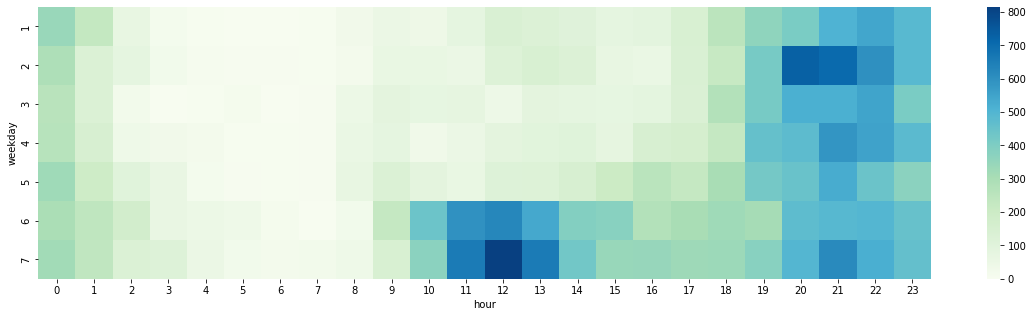

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df["weekday"] = [timestamp.isoweekday() for timestamp in df["date"]]
df["hour"] = [timestamp.hour for timestamp in df["date"]]
df["ones"] = np.ones(len(df))

views = df.pivot_table(index="weekday", columns="hour", values="ones", aggfunc=np.sum, fill_value=0)

plt.figure(figsize = (20, 5))
sns.heatmap(views, annot=False, cmap="GnBu") #Green and Blue

Line chart of videos watched over time 

<AxesSubplot:>

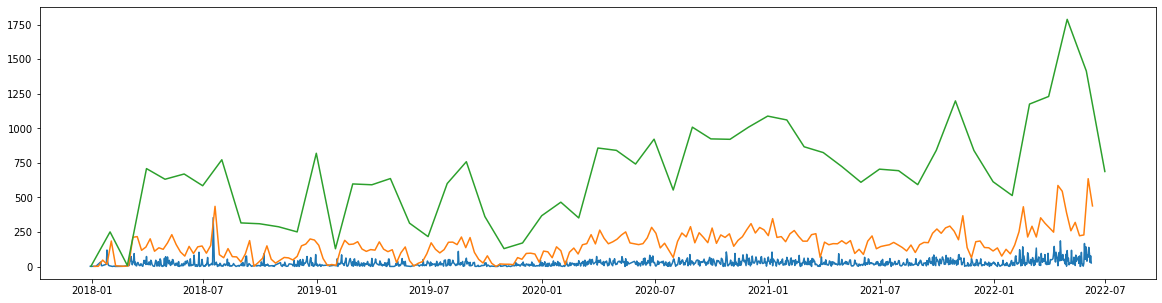

In [107]:

from pandas.tseries.offsets import *

df["day"] = pd.to_datetime(df['date']).dt.date

df['week ending'] = df['date'] + Week(weekday=4)
df["week ending day"] = pd.to_datetime(df['week ending']).dt.date

df['month ending'] = pd.to_datetime(df['date']) + MonthEnd(1)
df["month ending day"] = pd.to_datetime(df['month ending']).dt.date

s = df['day'].value_counts().sort_index()
s.plot(figsize=(20,5))

s2 = df['week ending day'].value_counts().sort_index()
s2.plot(figsize=(20,5))

s3 = df['month ending day'].value_counts().sort_index()
s3.plot(figsize=(20,5))
